(480, 640)


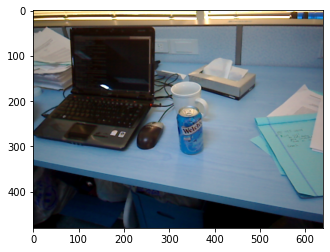

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

depth = plt.imread("desk_1_97_depth.png")
og = cv2.imread("desk_1_97.png")
print(depth.shape)
h, w = depth.shape[0], depth.shape[1]

x = np.linspace(0, w-1, w) - w/2 + 0.5
y = np.linspace(0, h-1, h) - h/2 + 0.5
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
plt.imshow(og)

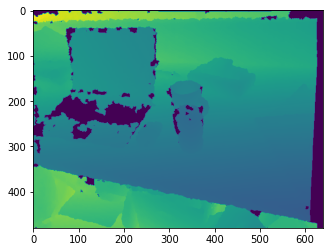

In [ ]:
betax = 0.1
betay = 0.1
pxtom = 10.0
z = (depth*pxtom).flatten()
plt.imshow(depth)
pc_x = z*xv*betax
pc_y = z*yv*betay

In [ ]:
colors = og.reshape(-1, og.shape[-1])/255.0

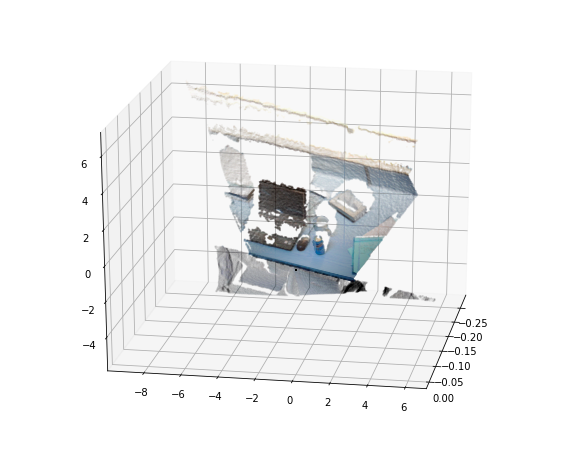

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.gca(projection='3d')
ax.view_init(20, 10)
ax.scatter3D(-z, pc_x, -pc_y, c=colors, s=0.001)

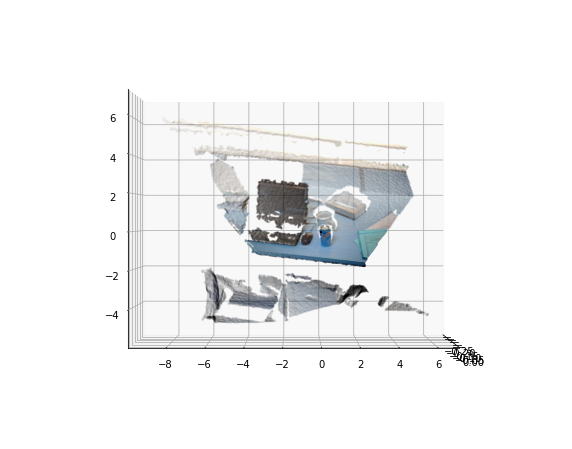

In [ ]:
ax.view_init(0, 0)
fig

In [ ]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2021-10-2 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
imgs = ["desk_1_97.png"]
results = model(imgs)

In [ ]:
df = results.pandas().xyxy[0]
df

,xmin,ymin,xmax,ymax,confidence,class,name
0,228.625000,245.000,291.0000,307.00,0.928223,64,mouse
1,0.125000,28.750,275.5000,308.50,0.888672,63,laptop
2,304.000000,157.500,384.5000,234.25,0.530762,41,cup
3,308.750000,156.750,382.7500,320.50,0.528809,39,bottle
4,482.000000,212.375,640.0000,414.50,0.439697,73,book
5,0.507812,168.750,21.3750,192.50,0.377930,64,mouse
6,0.000000,124.500,86.4375,176.50,0.327881,73,book
7,306.500000,154.750,386.0000,320.50,0.305908,41,cup
8,13.812500,187.875,256.2500,266.75,0.294434,66,keyboard
9,341.000000,103.250,494.0000,199.00,0.255127,73,book


In [ ]:
idx = 1
cup_x_min = int(df.at[idx, "xmin"])
cup_x_max = int(df.at[idx, "xmax"])
cup_y_min = int(df.at[idx, "ymin"])
cup_y_max = int(df.at[idx, "ymax"])
print(cup_x_min, cup_x_max, cup_y_min, cup_y_max)

0 275 28 308


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

depth = plt.imread("desk_1_97_depth.png")
og = cv2.imread("desk_1_97.png")
print(depth.shape)
h, w = depth.shape[0], depth.shape[1]

x = np.linspace(0, w-1, w) - w/2 + 0.5
y = np.linspace(0, h-1, h) - h/2 + 0.5
xv, yv = np.meshgrid(x, y)
# plt.imshow(og)

(480, 640)


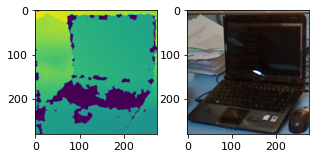

In [ ]:
xv = xv[cup_y_min:cup_y_max, cup_x_min:cup_x_max].flatten()
yv = yv[cup_y_min:cup_y_max, cup_x_min:cup_x_max].flatten()
betax = 0.1
betay = 0.1
pxtom = 10.0
z = (depth[cup_y_min:cup_y_max, cup_x_min:cup_x_max]*pxtom).flatten()

fig = plt.figure(figsize=(5, 5))
fig.add_subplot(2, 2, 1)
plt.imshow(depth[cup_y_min:cup_y_max, cup_x_min:cup_x_max])
fig.add_subplot(2, 2, 2)
plt.imshow(og[cup_y_min:cup_y_max, cup_x_min:cup_x_max])
pc_x = z*xv*betax
pc_y = z*yv*betay

In [ ]:
colors = og[cup_y_min:cup_y_max, cup_x_min:cup_x_max].reshape(-1, og[cup_y_min:cup_y_max, cup_x_min:cup_x_max].shape[-1])/255.0

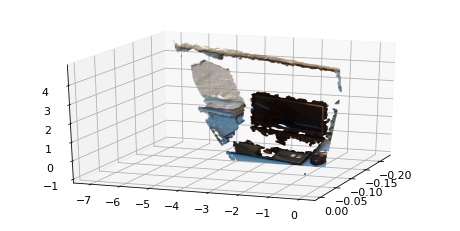

In [ ]:
fig = plt.figure(figsize=(8, 4))
ax = fig.gca(projection='3d')
ax.view_init(20, 20)
ax.scatter3D(-z, pc_x, -pc_y, c=colors, s=0.1)

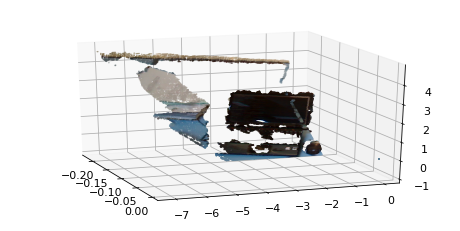

In [ ]:
ax.view_init(20, -20)
fig

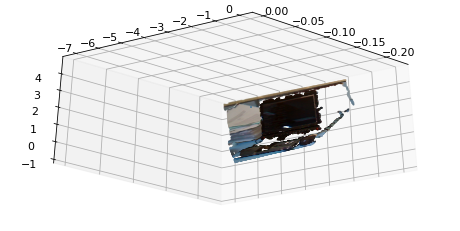

In [ ]:
ax.view_init(-30, 40)
fig